In [1]:
%matplotlib inline
import typhon as ty
import typhon.arts.xml as axml
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
ty.plots.styles.use()

In [27]:
abslookup_lm = axml.load('abslookup_lm.xml')
print(abslookup_lm.speciestags)
abslookup_nolm = axml.load('abslookup_nolm.xml')
print(abslookup_nolm.speciestags)

[['H2O-SelfContStandardType-*-*', 'H2O-ForeignContStandardType-*-*', 'H2O-*-*-*'], ['N2-SelfContStandardType-*-*'], ['O3-*-*-*'], ['CO2-LM-*-*-*']]
[['H2O-SelfContStandardType-*-*', 'H2O-ForeignContStandardType-*-*', 'H2O-*-*-*'], ['N2-SelfContStandardType-*-*'], ['O3-*-*-*'], ['CO2-*-*-*']]


In [28]:
co2_lm = abslookup_lm.absorptioncrosssection[0,3,:,:]
co2_nolm = abslookup_nolm.absorptioncrosssection[0,3,:,:]

CO2 cross sections with line mixing
--

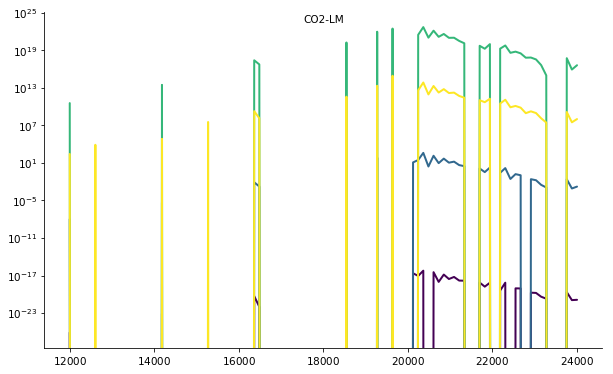

In [30]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_lm, [0, 10, 20, 40], species=[["CO2-LM-*-*-*"]])

CO2 cross sections without line mixing
--

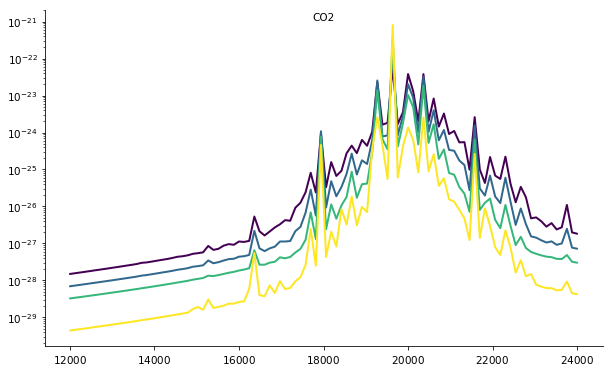

In [31]:
ty.plots.arts_lookup.plot_lookup_xsec(abslookup_nolm, [0, 10, 20, 40], species=[["CO2-*-*-*"]])

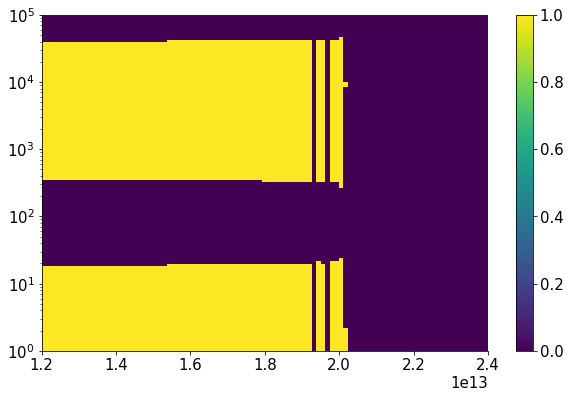

In [7]:
fig, ax = plt.subplots()
y, x = np.meshgrid(abslookup_lm.pressuregrid, abslookup_lm.frequencygrid)
cax = ax.pcolormesh(x, y, (co2_lm<-0.1).astype(int))
fig.colorbar(cax)
ax.set_yscale('log')


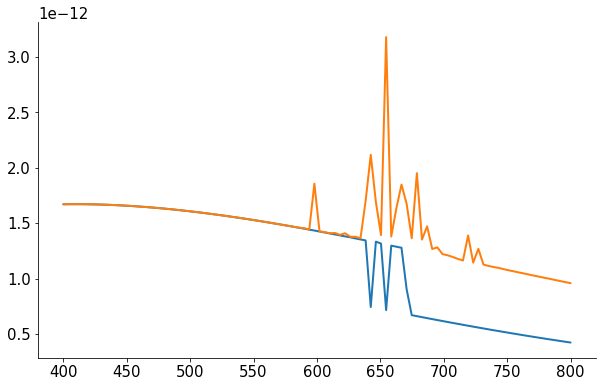

In [26]:
y_lm = axml.load('y_lm.xml')
y_nolm = axml.load('y_nolm.xml')
f = axml.load('TestLineMixing.f_grid.xml')
plt.plot(f/3e10, y_lm)
plt.plot(f/3e10, y_nolm)
